<a href="https://colab.research.google.com/github/seshankgit/.github/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis-Terrorism**

Perform 'Exploratory Data Analysis' on dataset 'GlobalTerrorism'. As a security/defense analyst, try to find out the hot zone of terrorism.What all security issues and insights you can derive by EDA?

**Importing all the libraries required for analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing and observing the data**

The data string is of latin1 encoding instead of UTF-8 encoding

In [ ]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


<ipython-input-3-1419c10f3354>:1: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 12.3+ MB


In [ ]:
df.shape

(11960, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
  print(i,end=" , ")

eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

**Cleaning the data**

In [ ]:
df=df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt','provstate','city' , 'latitude' , 'longitude' ,
       'summary','attacktype1_txt','targtype1_txt',
       'gname','motive', 'weaptype1_txt', 'nkill', 'nwound', 'addnotes']]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country',
                   'region_txt':'Region','provstate':'Province/State','city':'City',
                   'latitude':'Latitude', 'longitude':'Longitude','location':'Location',

       'summary':'Summary', 'attacktype1_txt': 'Attack Type','targtype1_txt': 'Target Type',
       'gname':'Group Name','motive':'Motive', 'weaptype1_txt':'Weapon Type',
                   'nkill':'killed', 'nwound':'Wounded', 'addnotes':'Add Notes'},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info

<bound method DataFrame.info of        Year  Month  Day             Country                       Region  \
0      1970      7    2  Dominican Republic  Central America & Caribbean   
1      1970      0    0              Mexico                North America   
2      1970      1    0         Philippines               Southeast Asia   
3      1970      1    0              Greece               Western Europe   
4      1970      1    0               Japan                    East Asia   
...     ...    ...  ...                 ...                          ...   
11955  1980      9   30            Colombia                South America   
11956  1980      9   30         El Salvador  Central America & Caribbean   
11957  1980      9   30         El Salvador  Central America & Caribbean   
11958  1980      9   30           Guatemala  Central America & Caribbean   
11959  1980      9   30              Turkey   Middle East & North Africa   

      Province/State               City   Latitude   Lo

In [ ]:
df.shape

(11960, 18)

In [ ]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State       42
City                  0
Latitude            390
Longitude           390
Summary           11072
Attack Type           0
Target Type           0
Group Name            1
Motive            11337
Weapon Type           1
killed             1535
Wounded            2865
Add Notes         11309
dtype: int64

In [ ]:
df["killed"]=df["killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casuality"]=df["killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,killed,Wounded,Casuality
count,11960.000000,11960.000000,11960.000000,11570.000000,11570.000000,11960.000000,11960.000000,11960.000000
mean,1976.726338,6.170569,15.243227,31.330726,-22.842727,0.879097,0.934783,1.813880
std,3.024931,3.338024,8.942614,22.026742,54.525074,5.929225,6.850653,9.788078
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1975.000000,3.000000,8.000000,14.622869,-75.416953,0.000000,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,39.930771,-5.956210,0.000000,0.000000,0.000000
75%,1979.000000,9.000000,23.000000,45.434336,11.346518,1.000000,0.000000,1.000000
max,1980.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


**Observation**

1. The data consists of terrorist activities ranging from the year: 1270 to 1980
2. Maximum number of people killed in an event were: 422
3. Maximum number of people wounded in an event were: 285
4. Maximum number of total casualities in an event were: 422

**Visualizing the data**

**1. Year wise Attacks**

1. Number of Attacks in each Year

In [ ]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


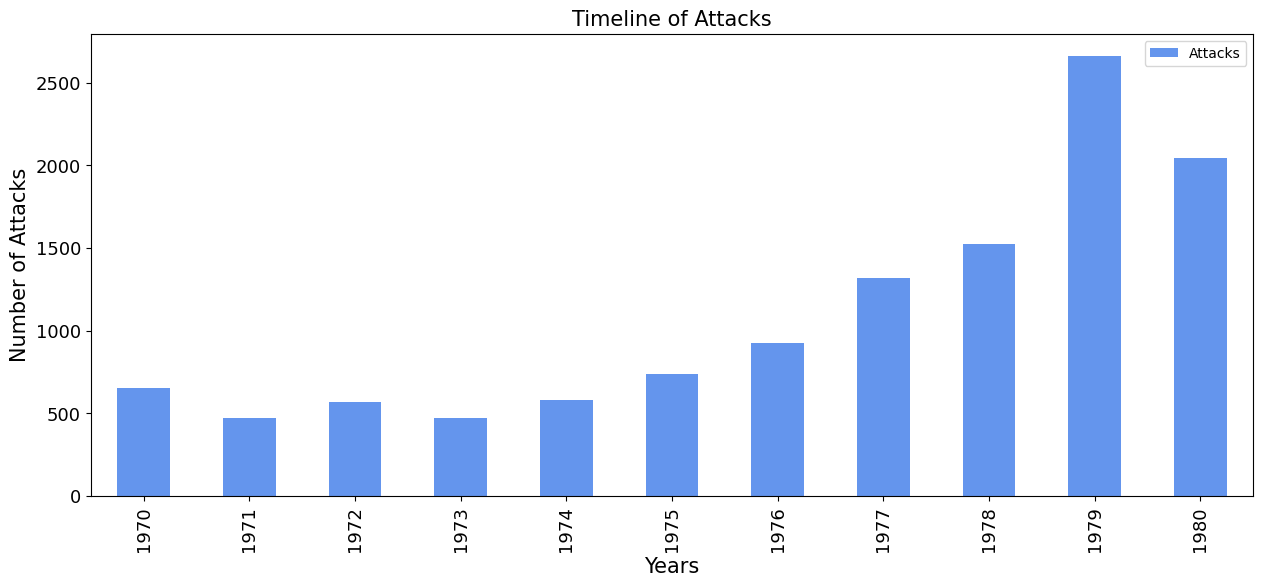

In [ ]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(2800) in 1979
(ii). Least number of attacks(450) in 1971



2. Total Casualities(Killed + Wounded) in each Year

In [ ]:
yc=df[["Year","Casuality"]].groupby("Year").sum()
yc.head()

,Casuality
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


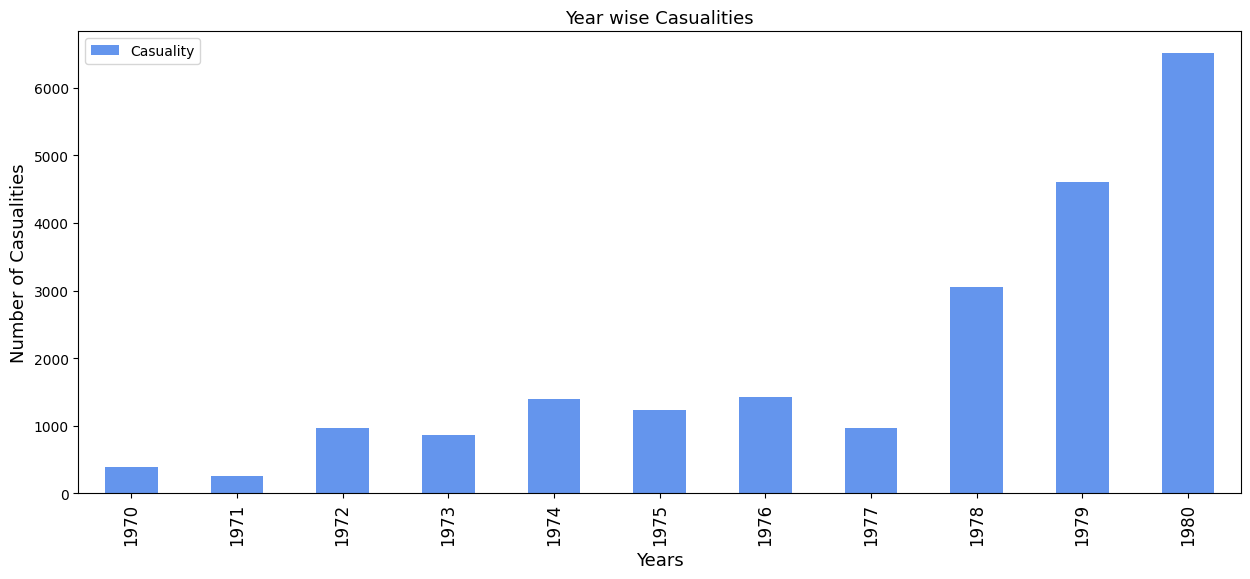

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualities",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()

3. Killed in each Year

In [ ]:
yk=df[["Year","killed"]].groupby("Year").sum()
yk.head()

,killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Wounded in each Region

In [ ]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


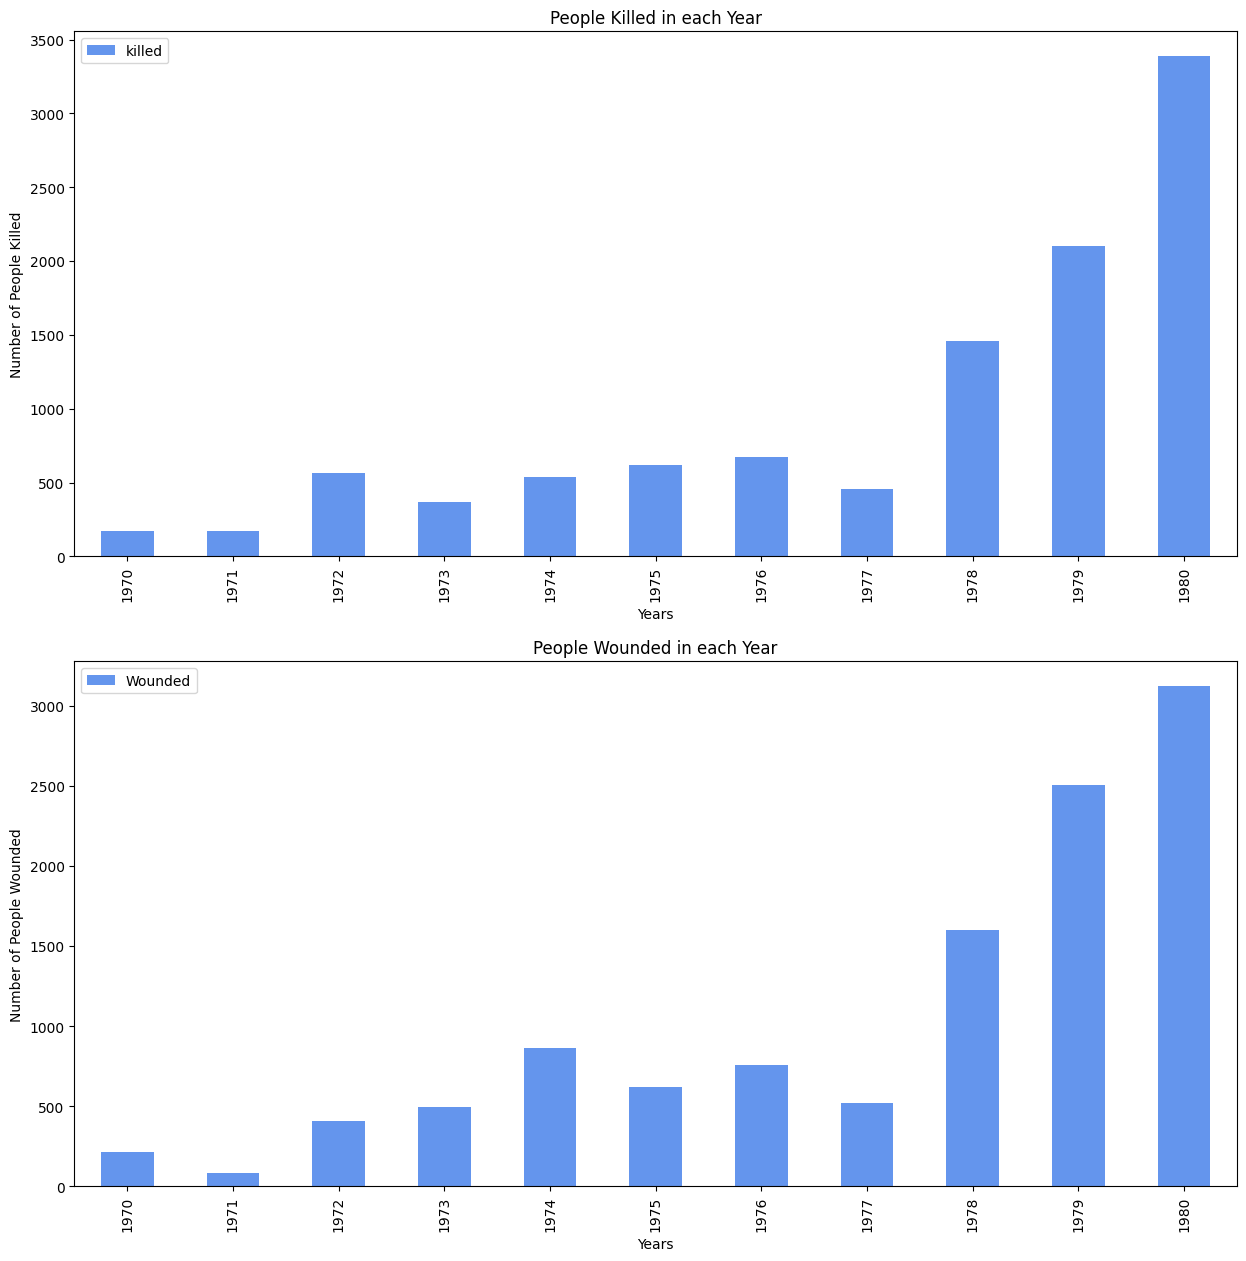

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")


#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**2. Region wise Attacks**

1. Distribution of Terrorist Attacks over Regions from 1970-2017

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


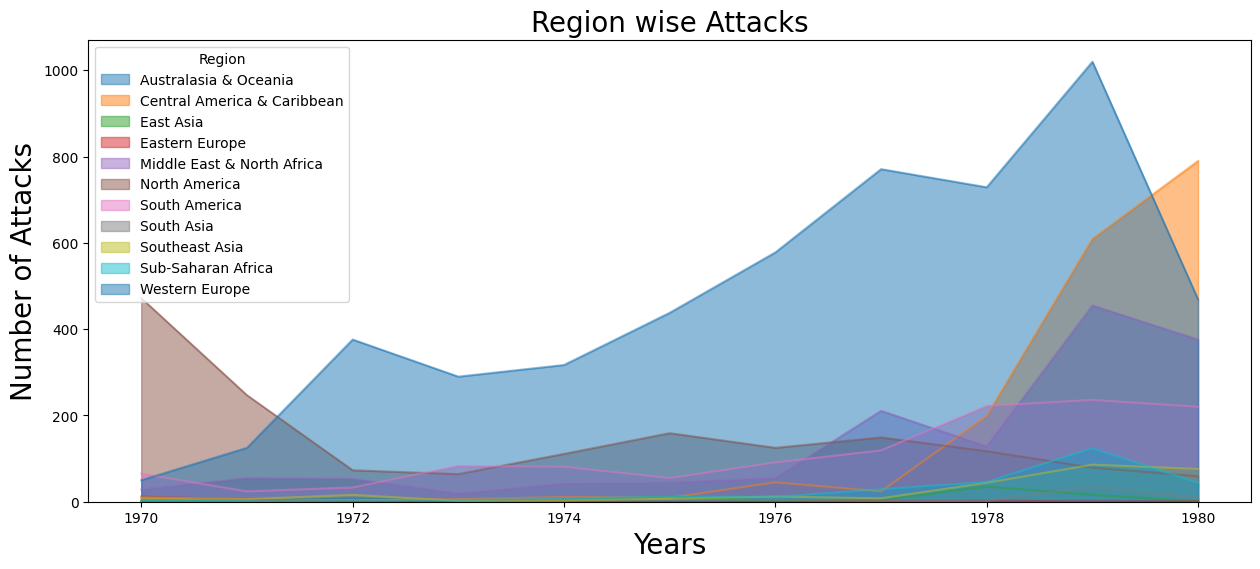

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5, figsize=(15,6))
plt.title("Region wise Attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

2. Total Terrorist Attacks in each Region from 1970-1980

In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 5163
Central America & Caribbean    1708
North America                  1655
Middle East & North Africa     1466
South America                  1229
Sub-Saharan Africa              286
Southeast Asia                  270
East Asia                        79
South Asia                       60
Eastern Europe                   27
Australasia & Oceania            17
Name: Total, dtype: int64

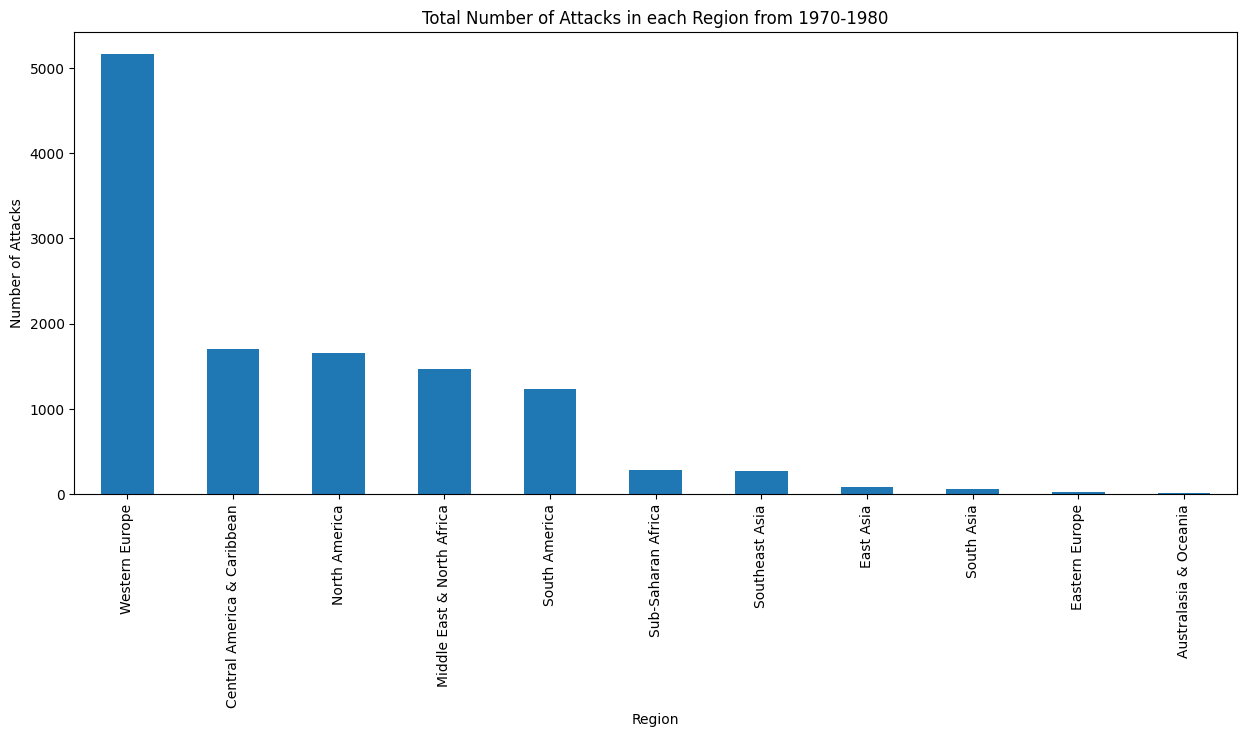

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-1980")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3. Total Casualities(Killed + Wounded) in each Region

In [ ]:
rc=df[["Region","Casuality"]].groupby("Region").sum().sort_values(by="Casuality",ascending=False)
rc

,Casuality
Region,
Western Europe,6573.0
Middle East & North Africa,5138.0
Central America & Caribbean,3875.0
Southeast Asia,2264.0
South America,1187.0
Sub-Saharan Africa,1158.0
North America,968.0
South Asia,351.0
East Asia,104.0


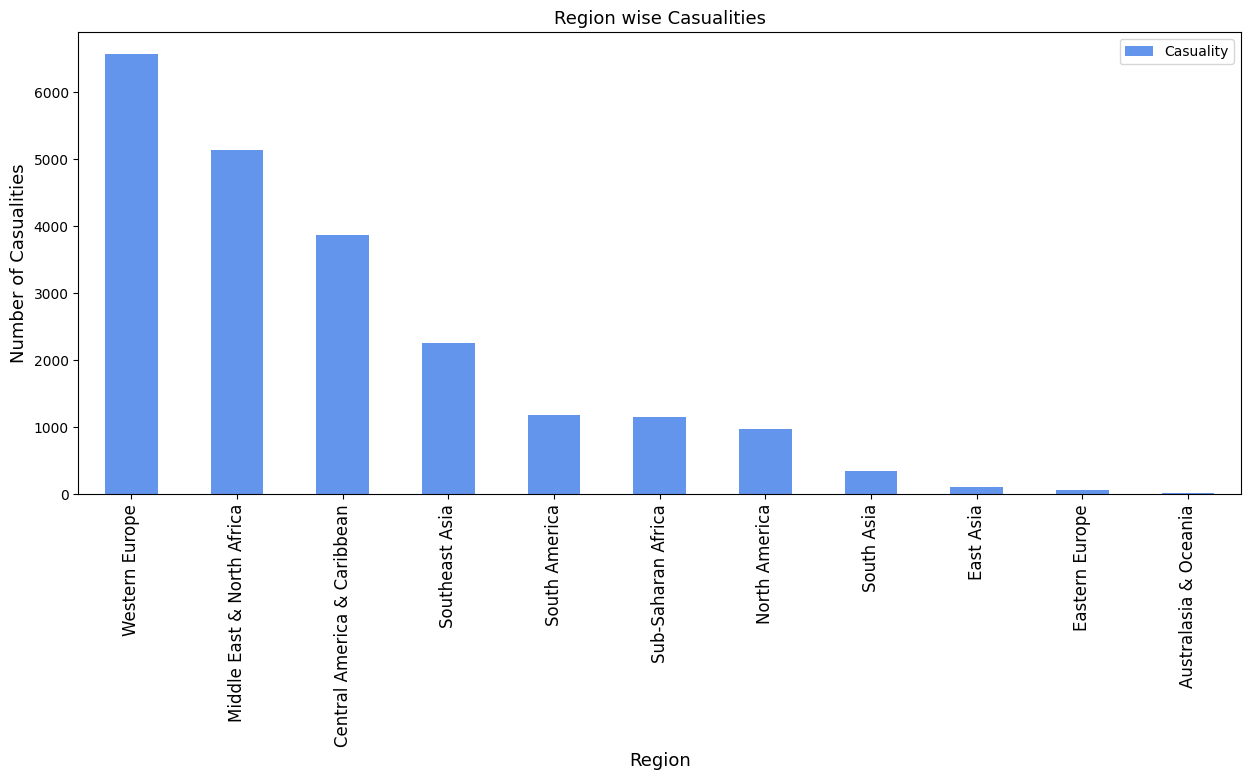

In [ ]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualities",fontsize=13)
plt.xlabel("Region",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()

4. Killed in each Region

In [ ]:
rk=df[["Region","killed"]].groupby("Region").sum().sort_values(by="killed",ascending=False)
rk

,killed
Region,
Central America & Caribbean,3107.0
Western Europe,2969.0
Middle East & North Africa,1707.0
Southeast Asia,920.0
South America,738.0
Sub-Saharan Africa,568.0
North America,284.0
South Asia,148.0
East Asia,37.0


5. Wounded in each Region

In [ ]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Western Europe,3604.0
Middle East & North Africa,3431.0
Southeast Asia,1344.0
Central America & Caribbean,768.0
North America,684.0
Sub-Saharan Africa,590.0
South America,449.0
South Asia,203.0
East Asia,67.0


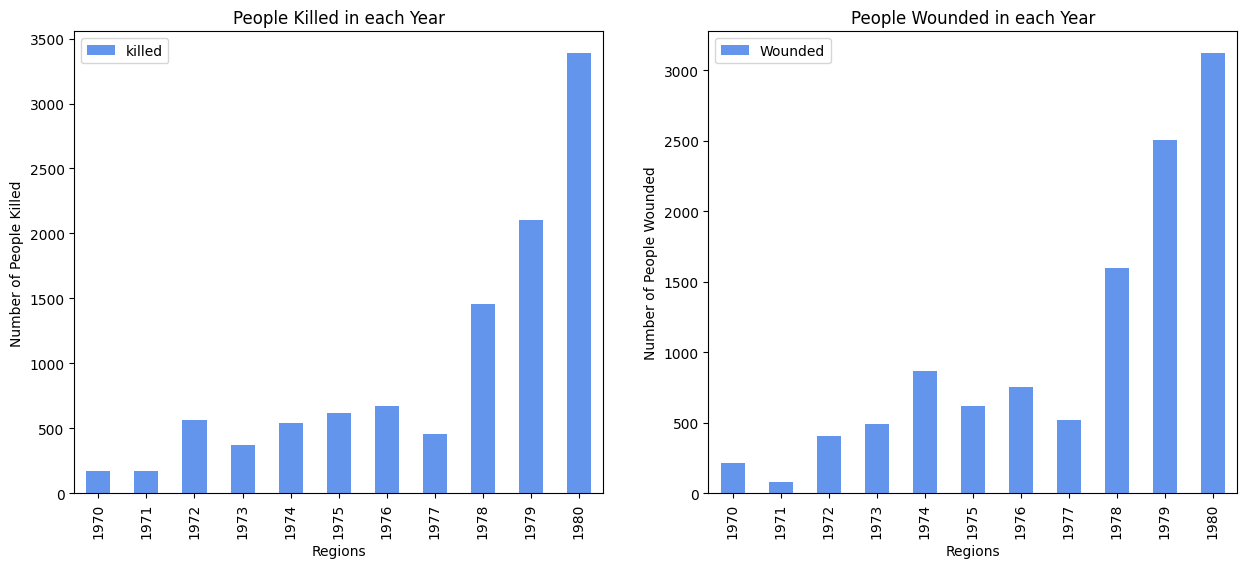

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")


#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**3. Country wise Attacks - Top 10**

1. Number of Attacks in each Country

In [ ]:
ct=df["Country"].value_counts().head(10)
ct

United Kingdom    1755
United States     1527
Italy             1112
Spain             1042
El Salvador        963
Turkey             571
France             552
Colombia           531
Guatemala          339
Argentina          334
Name: Country, dtype: int64

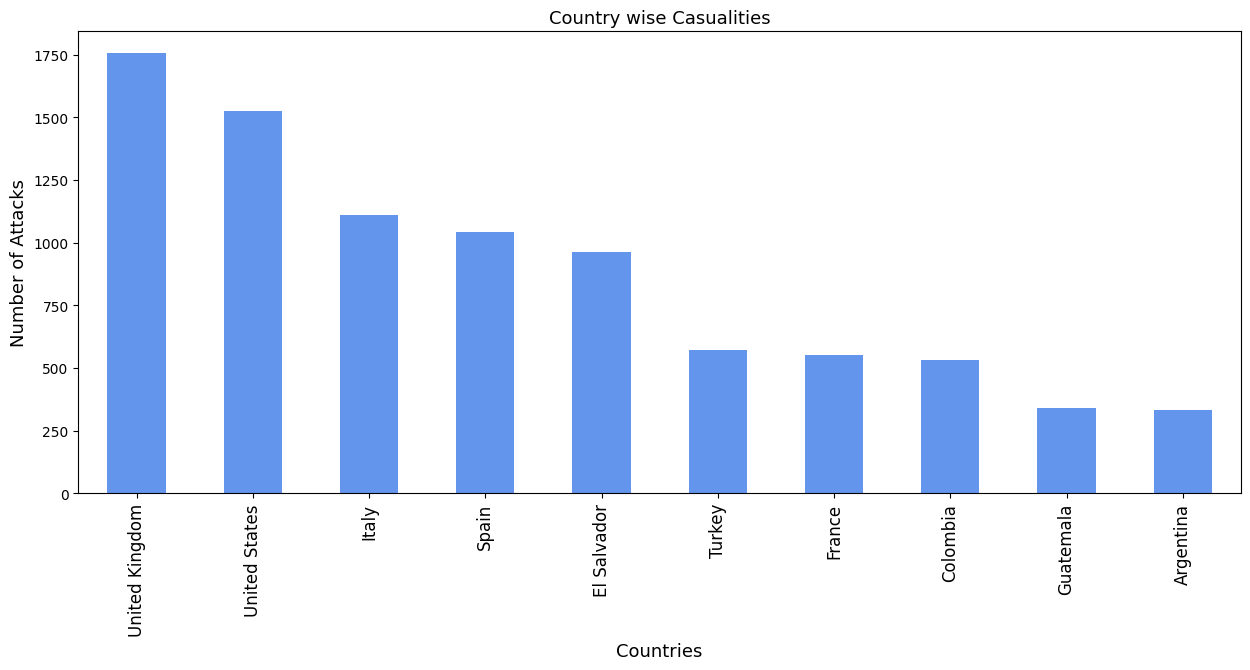

In [ ]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Casualities",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualities(Killed + Wounded) in each Country

In [ ]:
cnc=df[["Country","Casuality"]].groupby("Country").sum().sort_values(by="Casuality",ascending=False)
cnc.head(10)

,Casuality
Country,
United Kingdom,3155.0
El Salvador,2463.0
Israel,1335.0
Philippines,1300.0
Iran,1275.0
Spain,1114.0
Italy,1042.0
United States,829.0
Lebanon,788.0


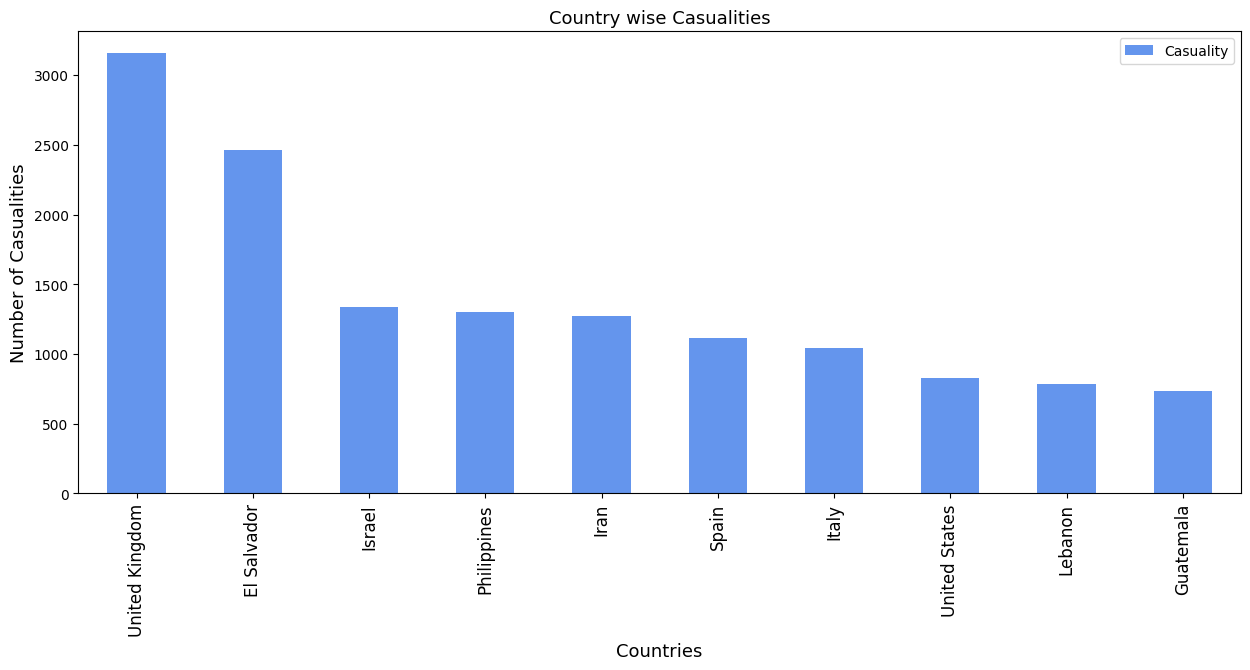

In [ ]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Casualities",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()

3. Killed in each Country

In [ ]:
cnk=df[["Country","killed"]].groupby("Country").sum().sort_values(by="killed",ascending=False)
cnk.head(10)

,killed
Country,
El Salvador,2102.0
United Kingdom,1833.0
Iran,581.0
Guatemala,553.0
Philippines,473.0
Spain,396.0
Nicaragua,349.0
Colombia,339.0
Argentina,328.0


4. Wounded in each Country

In [ ]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw

,Wounded
Country,
United Kingdom,1322.0
Israel,1071.0
Philippines,827.0
Italy,743.0
Spain,718.0
...,...
Somalia,0.0
Singapore,0.0
Senegal,0.0


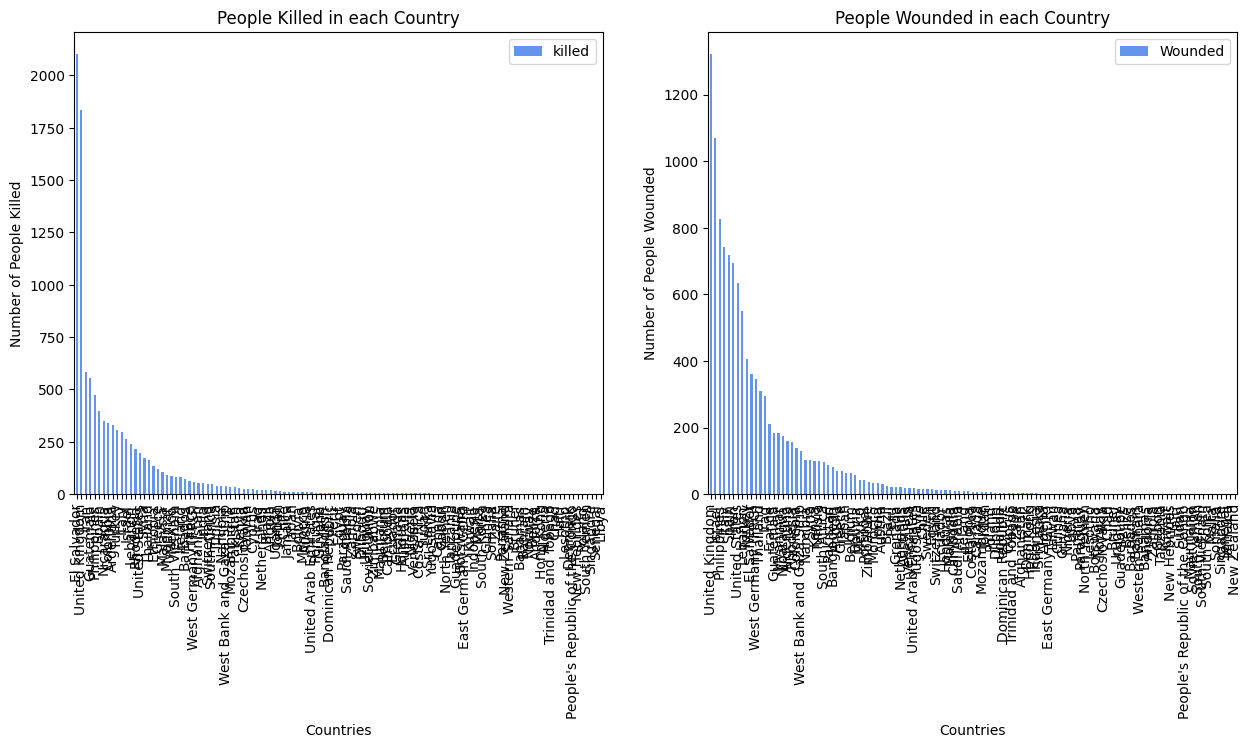

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
cnk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")


#Wounded
cnw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**4. City wise Attacks- Top 10**

1. Number of Attacks in each city

In [ ]:
city=df["City"].value_counts()[1:11]
city

Unknown           519
San Salvador      514
Rome              401
New York City     337
Paris             287
Madrid            211
Buenos Aires      206
Istanbul          177
Bogota            159
Guatemala City    156
Name: City, dtype: int64

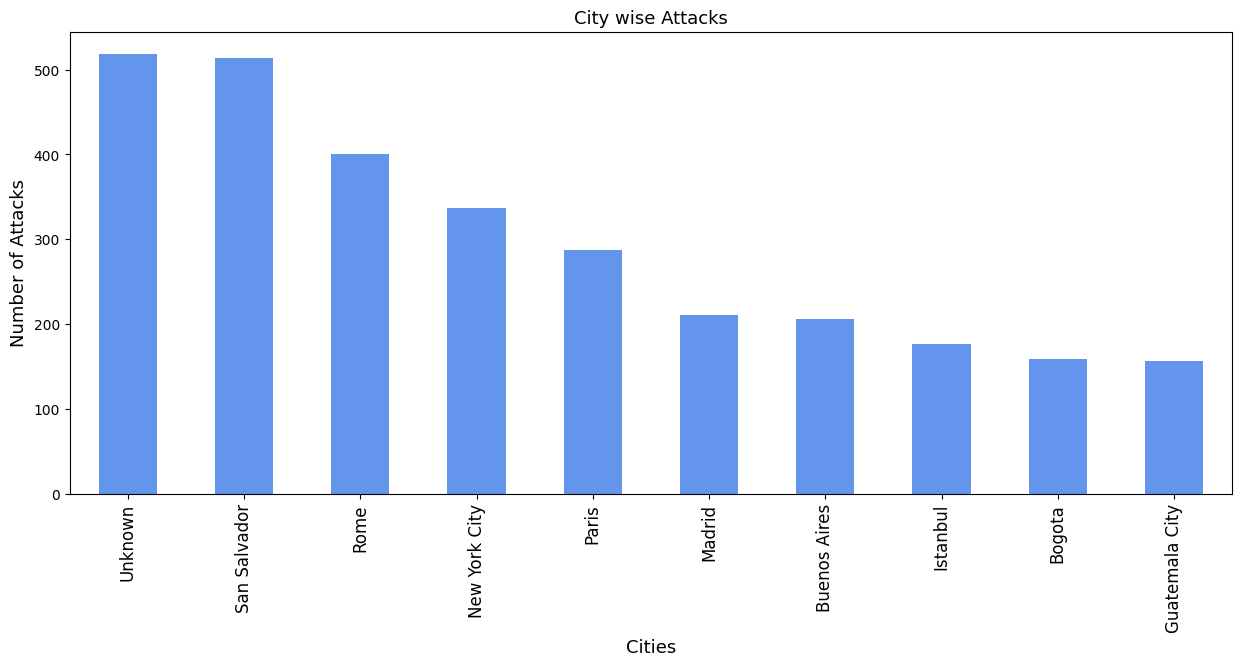

In [ ]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualities (Killed + Wounded) in each city

In [ ]:
cc=df[["City","Casuality"]].groupby("City").sum().sort_values(by="Casuality",ascending=False).drop("Unknown")
cc.head(10)

,Casuality
City,
Belfast,1212.0
Beirut,625.0
London,552.0
San Salvador,505.0
Jerusalem,497.0
Abadan,492.0
Madrid,381.0
Buenos Aires,360.0
Guatemala City,359.0


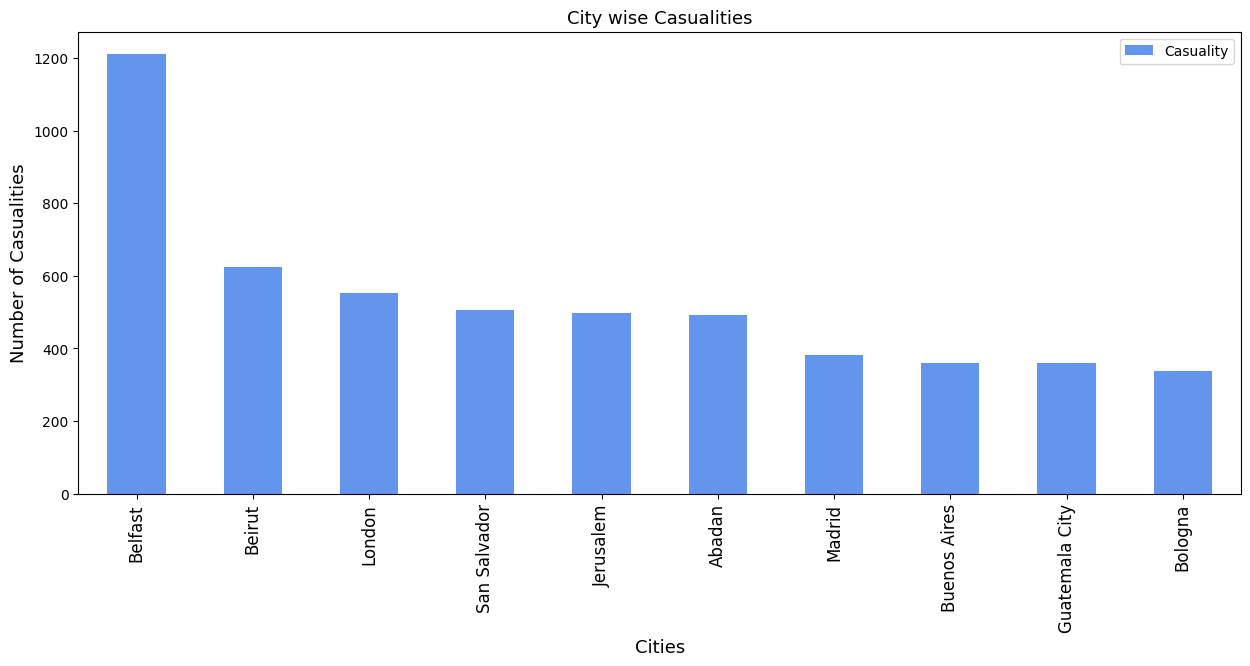

In [ ]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualities",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()

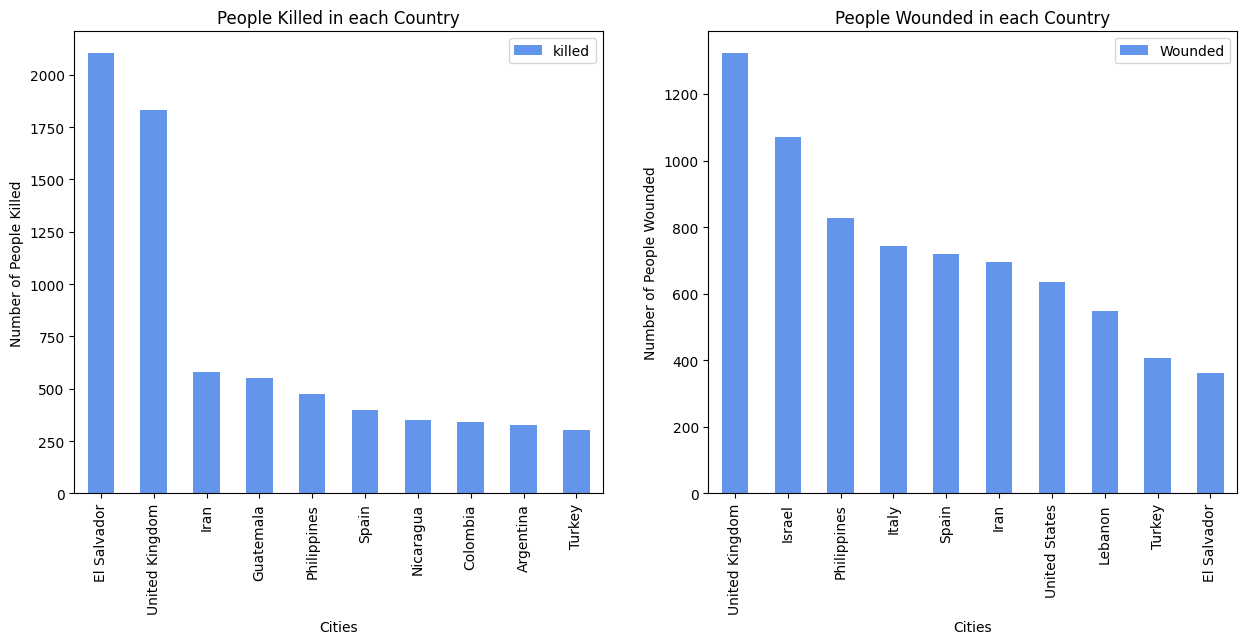

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")


#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**5.Terrorist Group wise Attacks- Top 10**

1. Number of Attacks by each Group

In [ ]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                    1106
Basque Fatherland and Freedom (ETA)             532
Palestinians                                    227
Protestant extremists                           205
Sandinista National Liberation Front (FSLN)     197
Red Brigades                                    177
Ulster Volunteer Force (UVF)                    173
Left-Wing Militants                             170
People's Liberation Forces (FPL)                167
Name: Group Name, dtype: int64

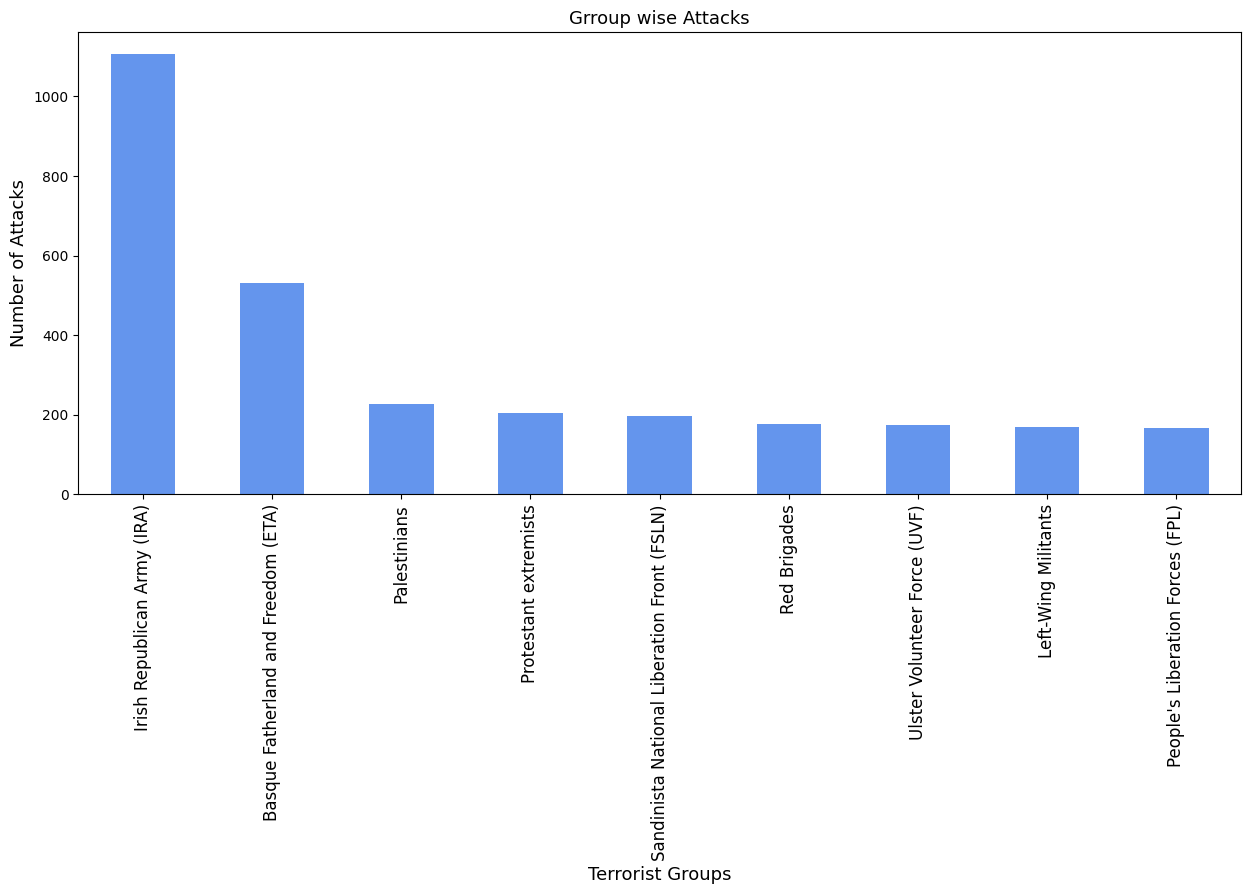

In [56]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Grroup wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualities(Killed+Wounded) by each Group

In [58]:
gc=df[["Group Name","Casuality"]].groupby("Group Name").sum().sort_values(by="Casuality",ascending=False)
gc.head(10)

,Casuality
Group Name,
Unknown,5631.0
Irish Republican Army (IRA),2297.0
Basque Fatherland and Freedom (ETA),786.0
Moro National Liberation Front (MNLF),773.0
Palestinians,704.0
Farabundo Marti National Liberation Front (FMLN),606.0
Mujahedin-e Khalq (MEK),457.0
Sandinista National Liberation Front (FSLN),366.0
Montoneros (Argentina),345.0


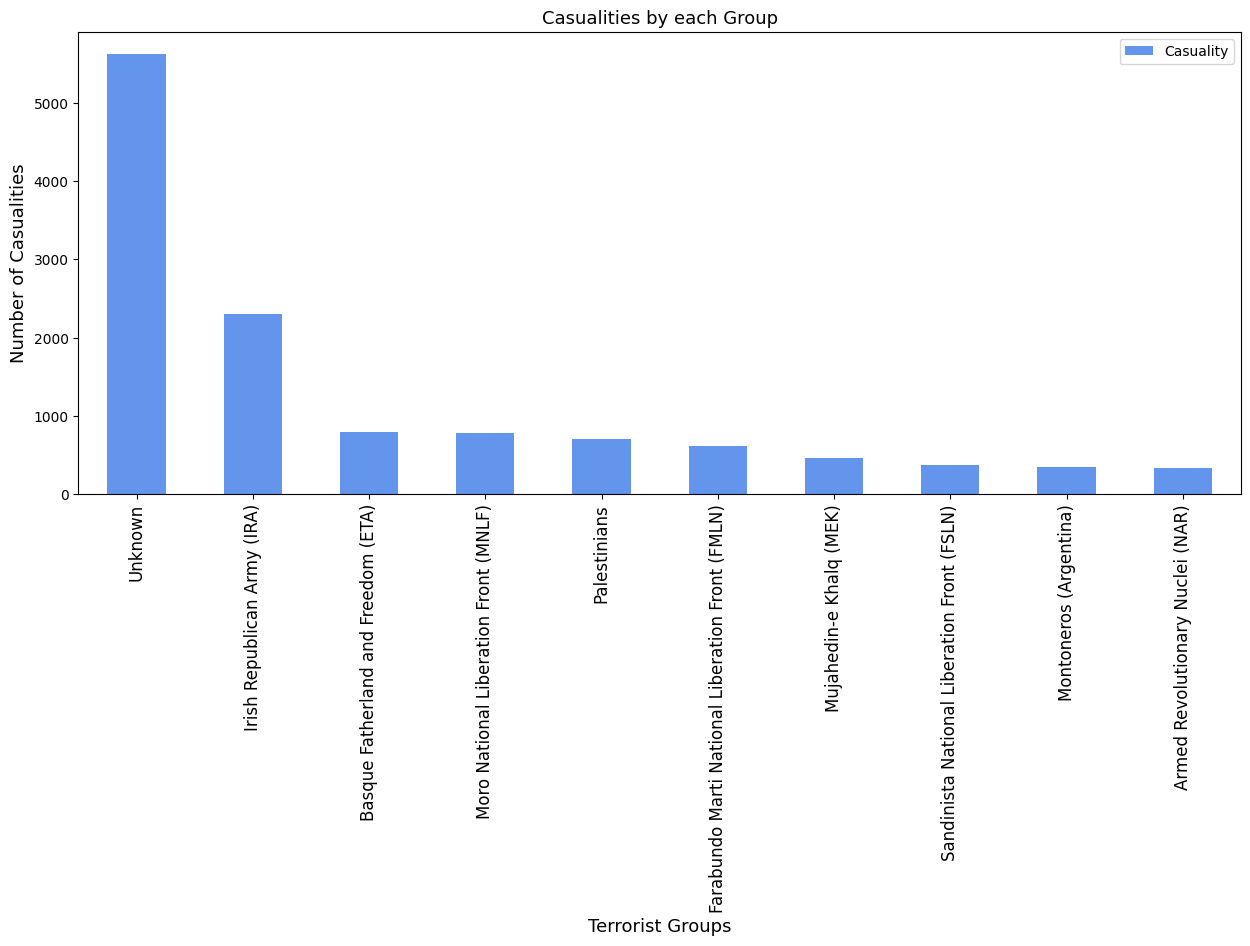

In [59]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualities by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()

3. Killed by each Group

In [61]:
gk=df[["Group Name","killed"]].groupby("Group Name").sum().sort_values(by="killed",ascending=False).drop("Unknown")
gk.head(10)

,killed
Group Name,
Irish Republican Army (IRA),1061.0
Farabundo Marti National Liberation Front (FMLN),467.0
Mujahedin-e Khalq (MEK),450.0
Moro National Liberation Front (MNLF),302.0
Ulster Volunteer Force (UVF),284.0
Basque Fatherland and Freedom (ETA),271.0
Sandinista National Liberation Front (FSLN),241.0
Protestant extremists,235.0
Montoneros (Argentina),212.0


In [62]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1236.0
Palestinians,603.0
Basque Fatherland and Freedom (ETA),515.0
Moro National Liberation Front (MNLF),471.0
Armed Revolutionary Nuclei (NAR),242.0
Popular Front for the Liberation of Palestine (PFLP),219.0
Neo-Nazi extremists,215.0
Ahmad Jibril,160.0
Democratic Front for the Liberation of Palestine (DFLP),152.0


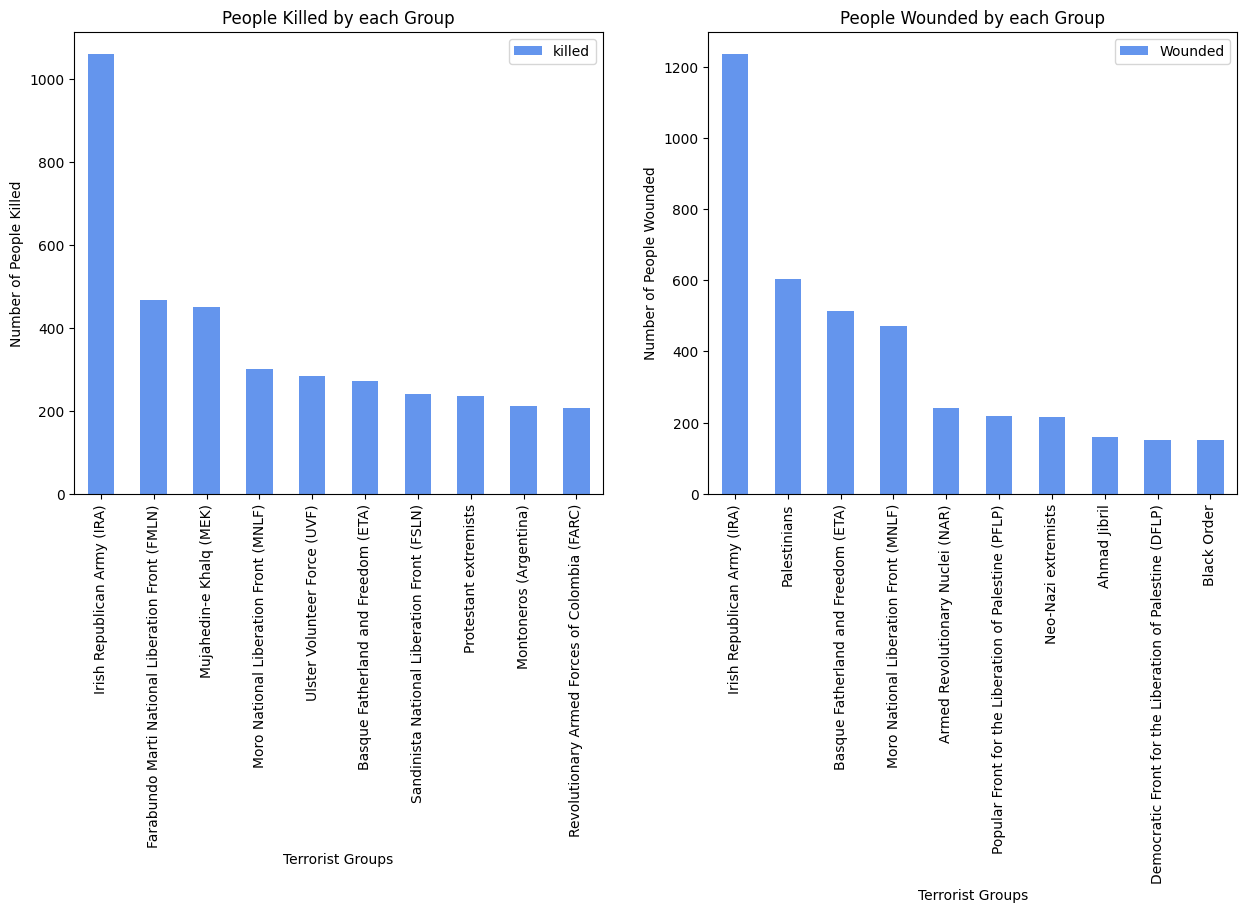

In [63]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of People Killed")


#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of People Wounded")

plt.show()

6. Attack Type wise Attacks

1. Number of Attacks by each Attack Type

In [64]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      5084
Assassination                          2467
Armed Assault                          1879
Facility/Infrastructure Attack         1227
Hostage Taking (Kidnapping)             641
Unknown                                 354
Hostage Taking (Barricade Incident)     211
Hijacking                                70
Unarmed Assault                          27
Name: Attack Type, dtype: int64

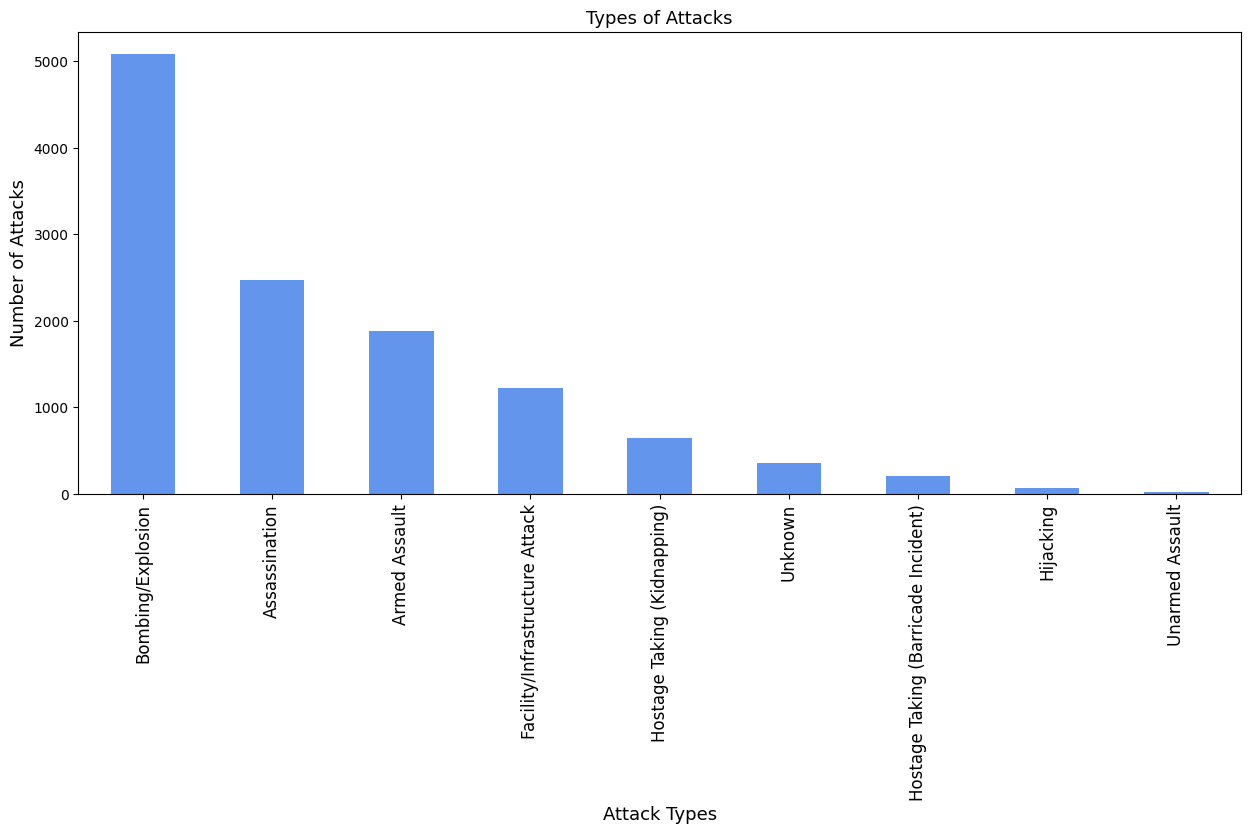

In [65]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualities(Killed+Wounded) by each Attack Type

In [66]:
ac=df[["Attack Type","Casuality"]].groupby("Attack Type").sum().sort_values(by="Casuality",ascending=False)
ac

,Casuality
Attack Type,
Bombing/Explosion,11028.0
Armed Assault,5112.0
Assassination,3186.0
Facility/Infrastructure Attack,755.0
Unknown,571.0
Hostage Taking (Barricade Incident),471.0
Hostage Taking (Kidnapping),319.0
Hijacking,226.0
Unarmed Assault,26.0


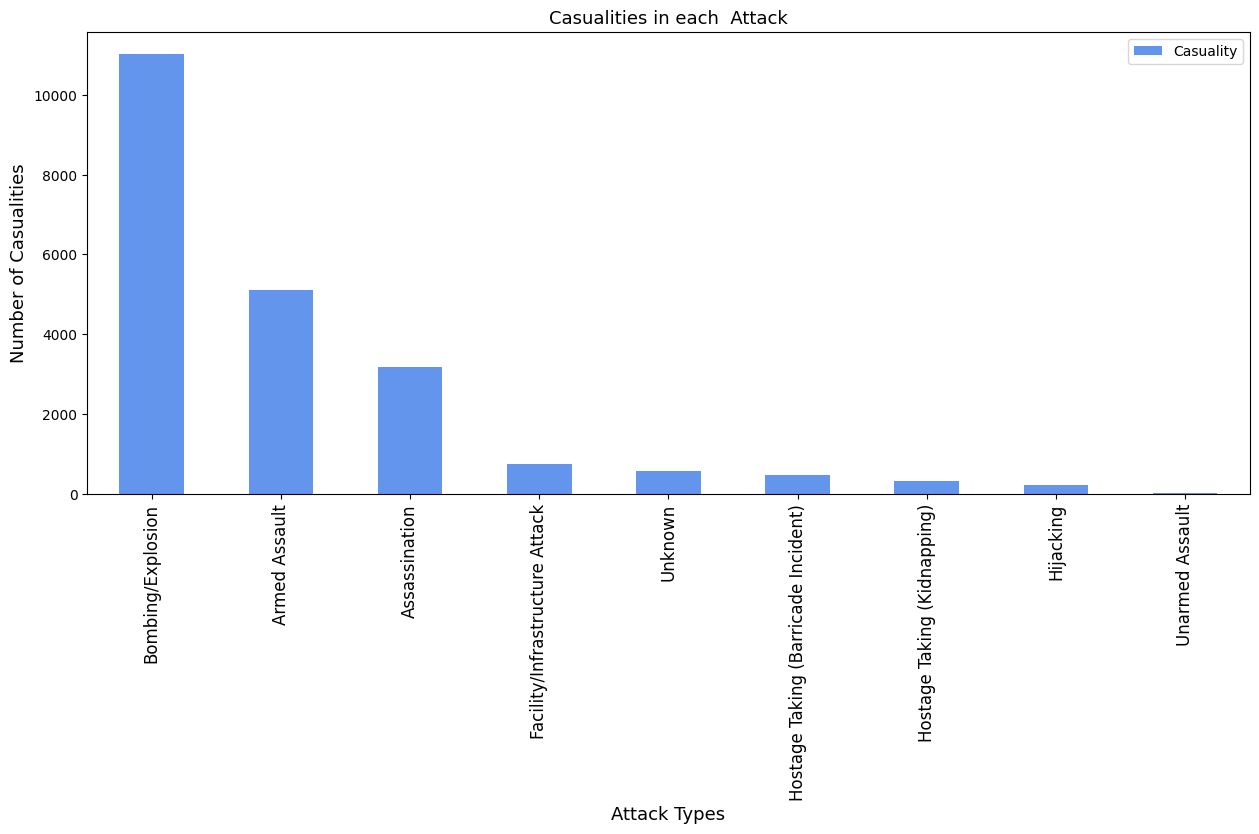

In [67]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualities in each  Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()

3. Killed by each Attack Type

In [68]:
ak=df[["Attack Type","killed"]].groupby("Attack Type").sum().sort_values(by="killed",ascending=False)
ak

,killed
Attack Type,
Armed Assault,3598.0
Bombing/Explosion,2762.0
Assassination,2520.0
Facility/Infrastructure Attack,513.0
Unknown,453.0
Hostage Taking (Kidnapping),271.0
Hostage Taking (Barricade Incident),206.0
Hijacking,175.0
Unarmed Assault,16.0


4. Wounded by each Attack Type

In [70]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,8266.0
Armed Assault,1514.0
Assassination,666.0
Hostage Taking (Barricade Incident),265.0
Facility/Infrastructure Attack,242.0
Unknown,118.0
Hijacking,51.0
Hostage Taking (Kidnapping),48.0
Unarmed Assault,10.0


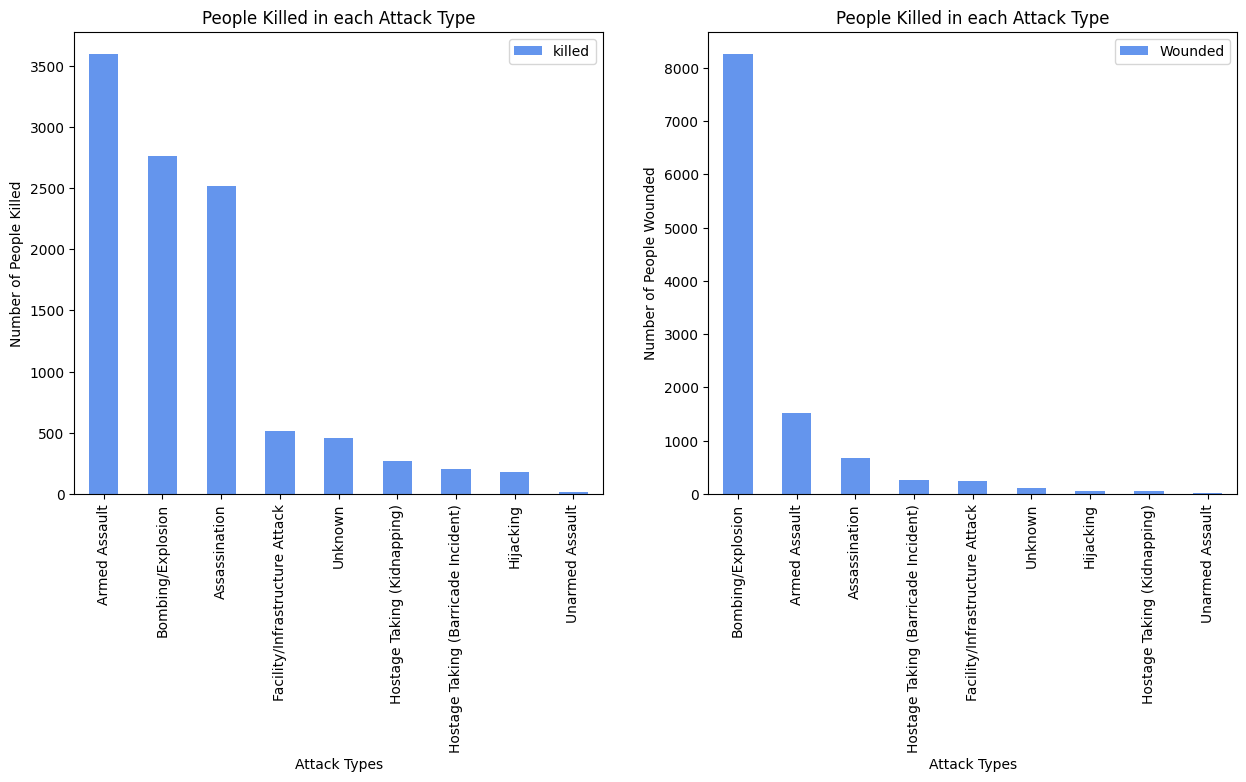

In [71]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of People Killed")


#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Killed in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of People Wounded")

plt.show()

 **7. Target Type wise Attacks**

1. Number of Attacks over each Target Type

In [72]:
ta=df["Target Type"].value_counts()
ta

Business                          2904
Private Citizens & Property       1876
Government (General)              1580
Military                          1252
Police                            1216
Government (Diplomatic)            765
Journalists & Media                376
Educational Institution            363
Transportation                     339
Airports & Aircraft                337
Utilities                          205
Terrorists/Non-State Militia       154
Religious Figures/Institutions     148
Unknown                            136
Telecommunication                   80
Violent Political Party             69
NGO                                 45
Tourists                            44
Maritime                            28
Food or Water Supply                21
Abortion Related                    14
Other                                8
Name: Target Type, dtype: int64

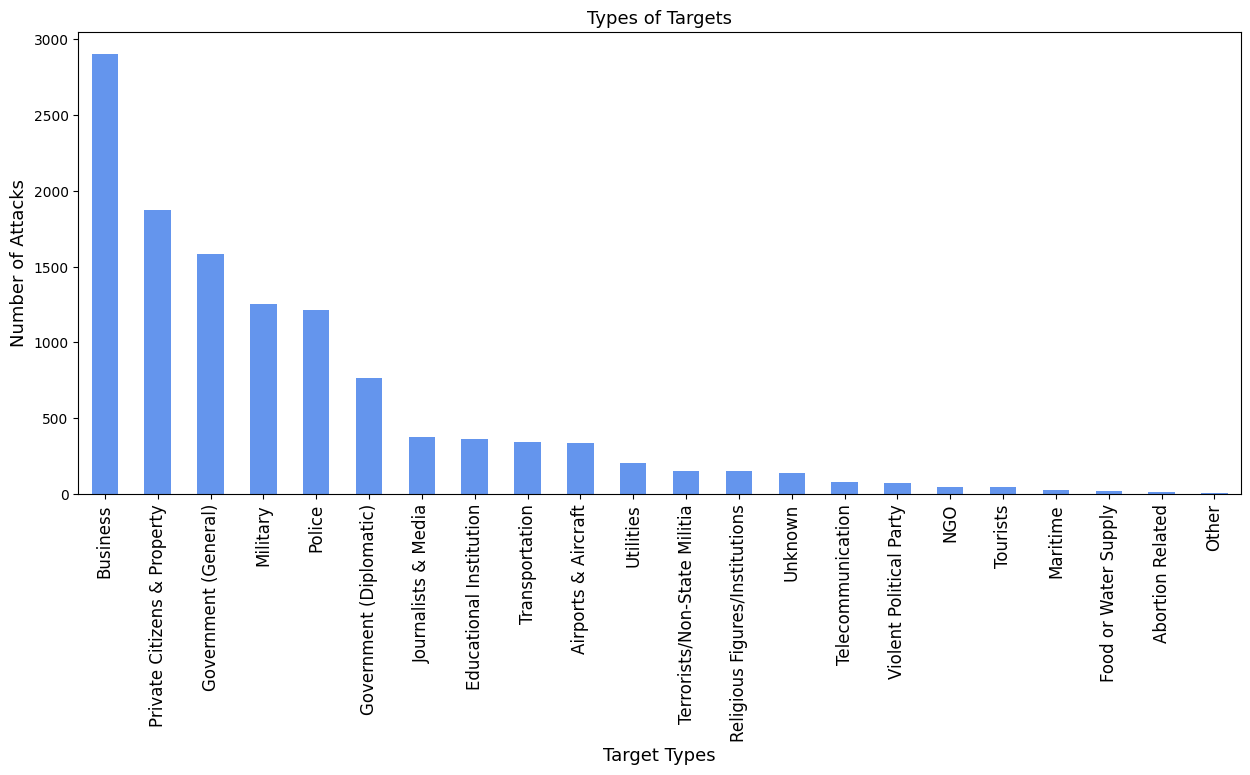

In [73]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [74]:
tc=df[["Target Type","Casuality"]].groupby("Target Type").sum().sort_values(by="Casuality",ascending=False)
tc

,Casuality
Target Type,
Private Citizens & Property,4022.0
Business,3885.0
Military,3538.0
Police,2073.0
Government (General),1942.0
Airports & Aircraft,1773.0
Transportation,1594.0
Educational Institution,535.0
Government (Diplomatic),486.0


In [75]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw

,Wounded
Target Type,
Business,2334.0
Private Citizens & Property,1967.0
Government (General),1253.0
Transportation,1134.0
Airports & Aircraft,984.0
Police,947.0
Military,914.0
Educational Institution,375.0
Government (Diplomatic),323.0


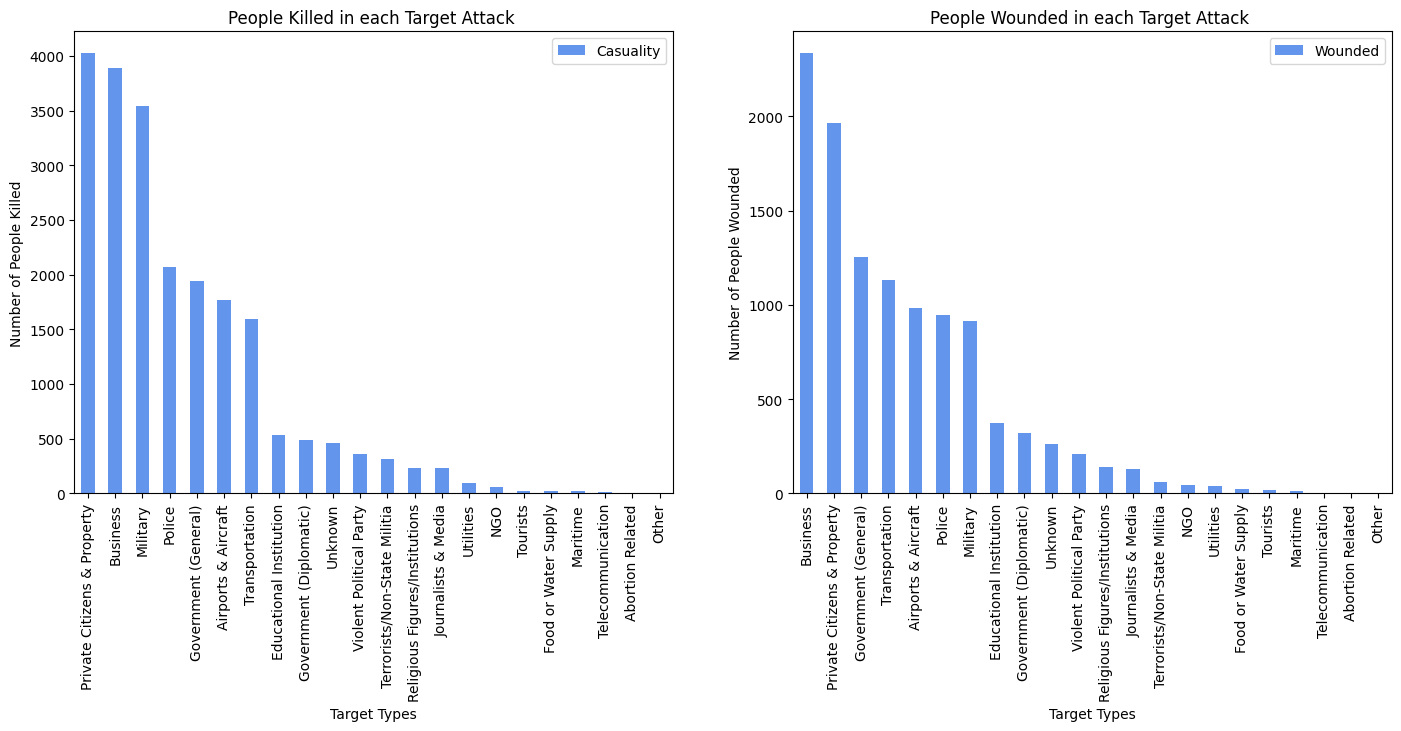

In [76]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
tc.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack ")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of People Killed")


#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack ")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**8. Group + Country wise= Top 10**

1.Sorting by number of Attacks

In [77]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

<ipython-input-77-e3f050b9d645>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                   Country       
Irish Republican Army (IRA)                  United Kingdom    1059
Basque Fatherland and Freedom (ETA)          Spain              524
Protestant extremists                        United Kingdom     203
Sandinista National Liberation Front (FSLN)  Nicaragua          193
Red Brigades                                 Italy              175
Left-Wing Militants                          United States      169
Ulster Volunteer Force (UVF)                 United Kingdom     168
People's Liberation Forces (FPL)             El Salvador        167
Corsican National Liberation Front (FLNC)    France             156
Palestinians                                 Israel             147
dtype: int64

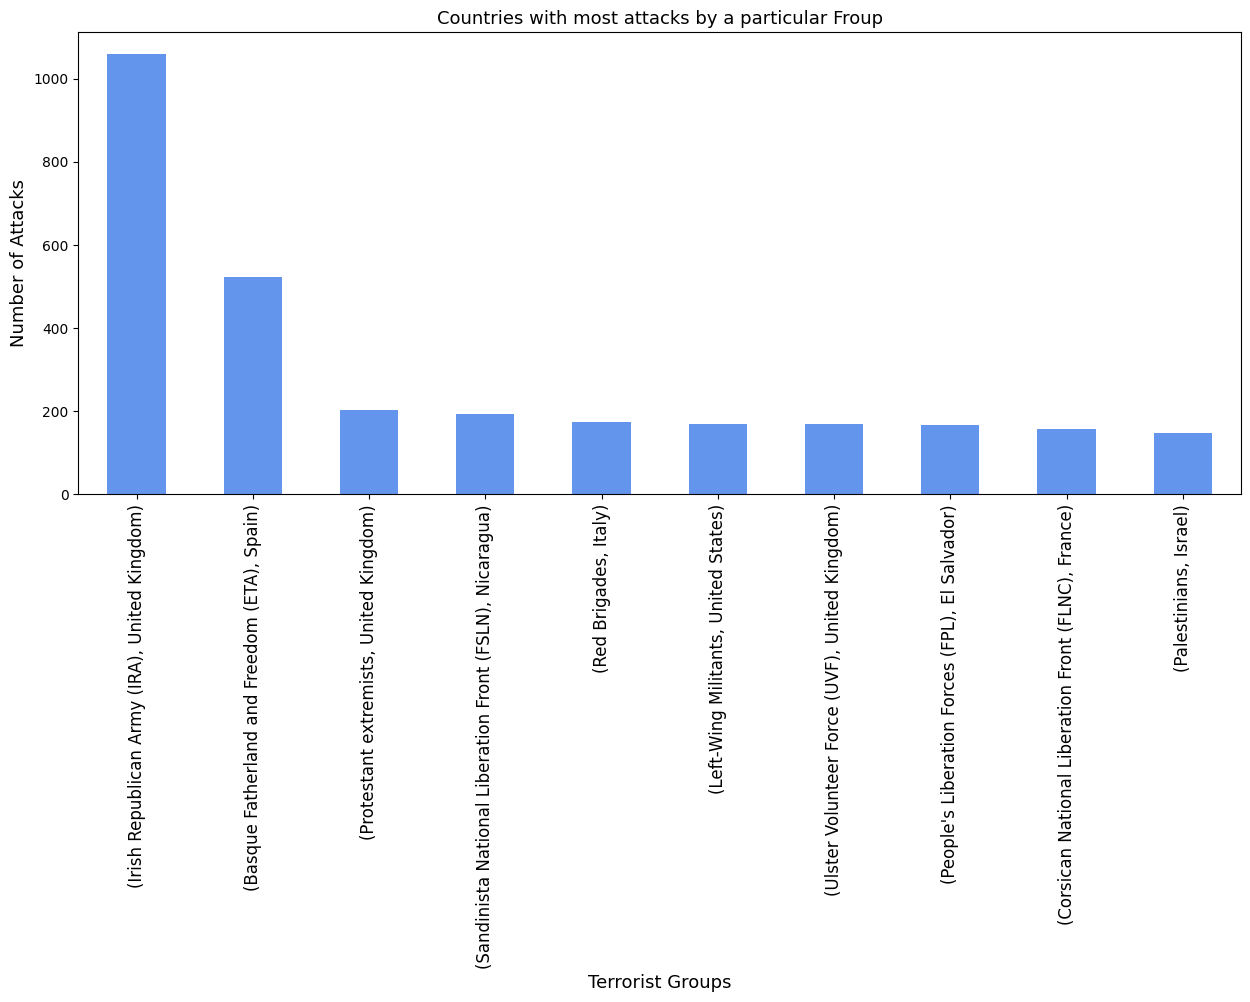

In [78]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Froup",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2.Sorting by number of Casualities

In [80]:
gcc=df[["Group Name","Country","Casuality"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casuality",ascending=False)
gcc

,,Casuality
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,2230.0
Unknown,El Salvador,1367.0
Basque Fatherland and Freedom (ETA),Spain,782.0
Moro National Liberation Front (MNLF),Philippines,773.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,605.0
...,...,...
Jewish Combat Organization,France,0.0
Jewish Committee of Concern,United States,0.0
Jewish Defense League (JDL),France,0.0


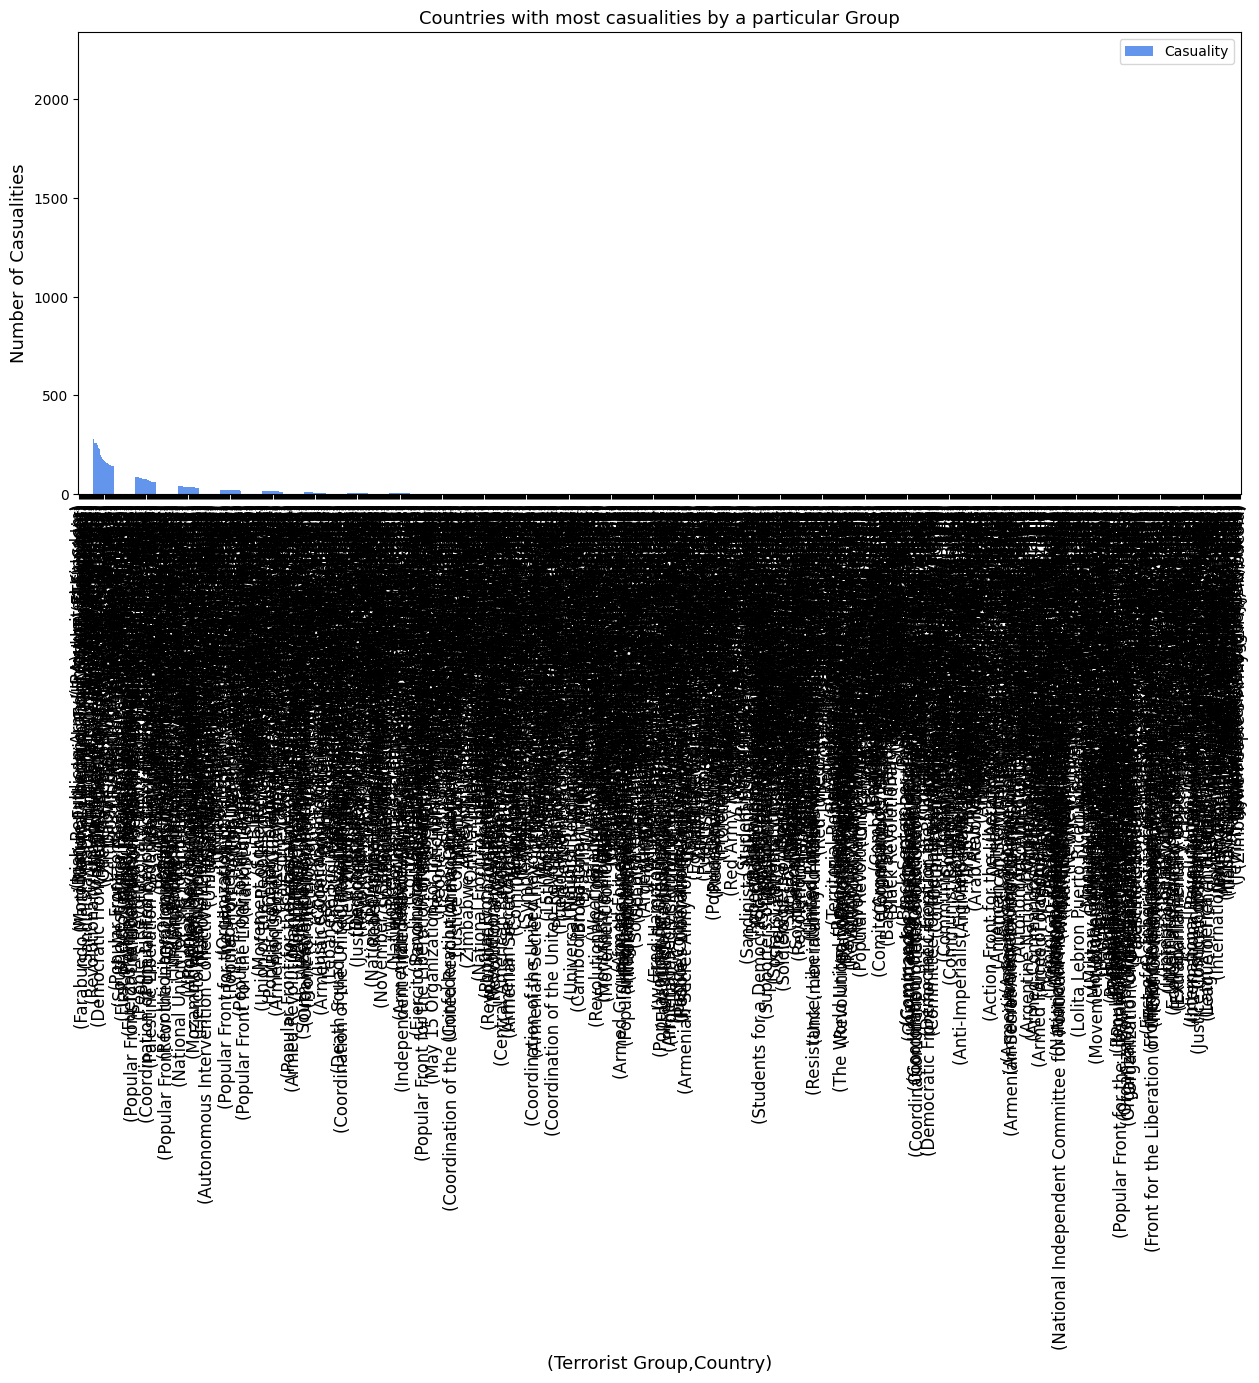

In [81]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualities by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualities",fontsize=13)
plt.show()